In [26]:
# Zoo dataset으로 다항 분류 모델 생성
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Input, Dense, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import load_model

url = 'https://raw.githubusercontent.com/pykwon/python/refs/heads/master/testdata_utf8/zoo.csv'
datas = pd.read_csv(url)
print(datas.head(3))

# feature / label 구분
x_data = datas.iloc[:, :-1].astype('float32') # 정수보단 실수를 좋아한다
y_data = datas.iloc[:, -1].astype('int32') # 레이블은 정수화
# print(x_data[:2], x_data.shape) # (101, 16)
# print(y_data[:2], y_data.shape) # (101, )

# 0 - 포유류, 

# classes 범주
nb_classes = len(set(y_data))
# print(nb_classes) # 7 [0 1 2 3 4 5 6]

# train / test 
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.3, random_state=12, stratify=y_data)

   hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  backbone  \
0     1         0     0     1         0        0         1        1         1   
1     1         0     0     1         0        0         0        1         1   
2     0         0     1     0         0        1         1        1         1   

   brethes  venomous  fins  legs  tail  domestic  catsize  type  
0        1         0     0     4     0         0        1     0  
1        1         0     0     4     1         0        1     0  
2        0         0     1     0     1         0        0     3  


In [27]:
# 모델 정의
model = Sequential([
    Input(shape=(x_data.shape[1], )),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(nb_classes, activation='softmax')
])
print(model.summary())

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # sparse_categorical_crossentropy 원핫인코딩 안했을 경우.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,399 (13.28 KB)

 Trainable params: 3,399 (13.28 KB)

 Non-trainable params: 0 (0.00 B)

None


In [28]:
# callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10,restore_best_weights=True)
# restore_best_weights : 학습 종료 후 가장 좋은 val_loss를 기록한 epoch의 가중치

# Checkpoint
checkpoint = ModelCheckpoint('best_zoo_model.keras', monitor='val_loss', save_best_only=True)

history = model.fit(x_train, y_train, epochs=1000, validation_split=0.2, callbacks=[early_stopping, checkpoint], verbose=2)

# 평가
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print(f'최종 평가 : loss={loss:.4f}, accuracy={acc*100:.4f}%')

Epoch 1/1000
1/1 - 1s - 854ms/step - accuracy: 0.2500 - loss: 2.3423 - val_accuracy: 0.0000e+00 - val_loss: 2.2912
Epoch 2/1000
1/1 - 0s - 68ms/step - accuracy: 0.2500 - loss: 2.0269 - val_accuracy: 0.0000e+00 - val_loss: 2.1606
Epoch 3/1000
1/1 - 0s - 62ms/step - accuracy: 0.1667 - loss: 2.0151 - val_accuracy: 0.0000e+00 - val_loss: 2.0447
Epoch 4/1000
1/1 - 0s - 59ms/step - accuracy: 0.2917 - loss: 2.0390 - val_accuracy: 0.0000e+00 - val_loss: 1.9390
Epoch 5/1000
1/1 - 0s - 62ms/step - accuracy: 0.2083 - loss: 2.0198 - val_accuracy: 0.3333 - val_loss: 1.8442
Epoch 6/1000
1/1 - 0s - 58ms/step - accuracy: 0.3333 - loss: 1.6805 - val_accuracy: 0.3333 - val_loss: 1.7583
Epoch 7/1000
1/1 - 0s - 59ms/step - accuracy: 0.1667 - loss: 2.0438 - val_accuracy: 0.6667 - val_loss: 1.6772
Epoch 8/1000
1/1 - 0s - 60ms/step - accuracy: 0.2500 - loss: 1.7739 - val_accuracy: 0.6667 - val_loss: 1.6072
Epoch 9/1000
1/1 - 0s - 59ms/step - accuracy: 0.2500 - loss: 1.8576 - val_accuracy: 0.6667 - val_loss: 

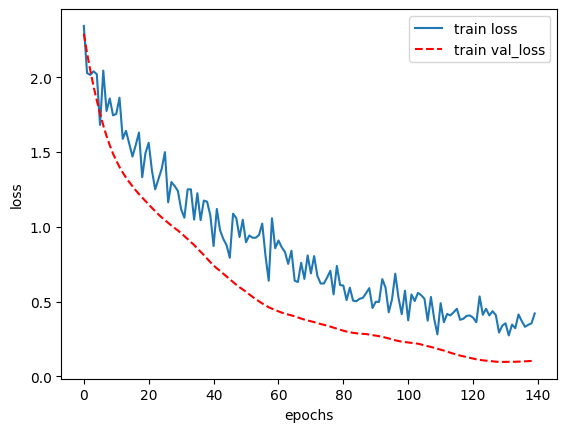

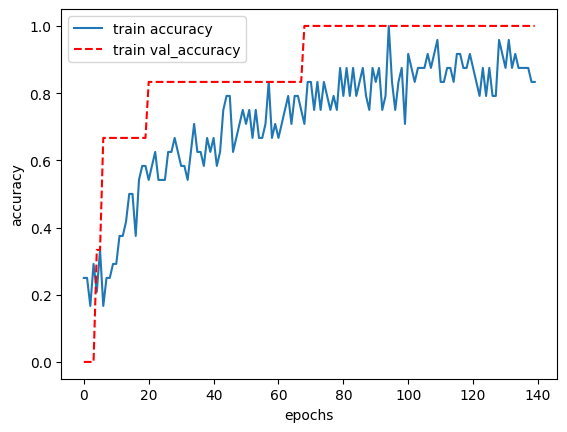

In [32]:
# 학습 곡선 시각화
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'],'r--', label='train val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()

plt.clf()
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'],'r--', label='train val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.show()
plt.close()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
[3 0 1 1 1 0 2 3 3 0 0 6 0 5 0 1 0 0 0 0 2 5 0 1 0 1 5 6 0 3 1 6 0 5 1 1 1
 3 0 6 1 1 1 3 5 0 1 6 3 0 0 0 5 1 6 0 0 0 1 5 0 0 0 0 4 0 0 0 3 1 3]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.82      1.00      0.90        14
           2       0.50      0.33      0.40         3
           3       1.00      1.00      1.00         9
           4       1.00      0.33      0.50         3
           5       0.86      1.00      0.92         6
           6       0.50      0.43      0.46         7

    accuracy                           0.89        71
   macro avg       0.81      0.73      0.74        71
weighted avg       0.88      0.89      0.87        71

[[29  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0]
 [ 0  1  1  0  0  0  1]
 [ 0  0  0  9  0  0  0]
 [ 0  0  0  0  1  0  2]
 [ 0  0  0  0  0  6  0]
 [ 0  2  1  0  0  1  3]]


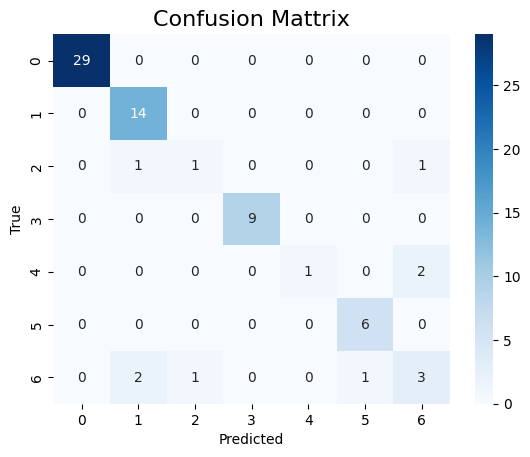

In [33]:
# confusion matrix & report
y_pred = np.argmax(model.predict(x_test), axis=1)
print(y_pred)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print(cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Mattrix', fontsize=16, )
plt.show()
plt.close()

In [35]:
# 베스트 모델 읽기
best_model = load_model('best_zoo_model.keras')

# 평가
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print(f'최종 평가 : loss={loss:.4f}, accuracy={acc*100:.4f}%')

# 데이터 분류
new_data = np.array([[1.,0.,1.,1.,0.,1.,0.,0.,1.,0.,1.,4.,0.,1.,0.,1.]])
probs = best_model.predict(new_data)
print(probs)
pred_class = np.argmax(probs)
print(f'예측 결과 : {pred_class}')

3/3 - 0s - 15ms/step - accuracy: 0.8873 - loss: 0.3770
최종 평가 : loss=0.3770, accuracy=88.7324%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[1.3313946e-01 1.0776353e-04 7.3897938e-04 8.6520457e-01 3.7514584e-04
  3.8322882e-04 5.0884475e-05]]
예측 결과 : 3
